<a href="https://colab.research.google.com/github/pujitha014/MACHINE_LEARNING/blob/main/gradient_ann%2Bsvm_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x=df.drop("Outcome",axis=1).values
y=df["Outcome"].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
from sklearn.svm import SVC
import numpy as np

svm_classifier = SVC(kernel='rbf',gamma=0.04)
svm_classifier.fit(x, y)

svm_predictions = svm_classifier.predict(x)

svm_accuracy = np.mean(svm_predictions==y)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.796875


In [ ]:
print(x)
x= np.column_stack((x, svm_predictions))


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Epoch 0, Loss: 0.44870323352854896
Epoch 100, Loss: 0.20159963057349567
Epoch 200, Loss: 0.1853301236423672
Epoch 300, Loss: 0.1740900144172455
Epoch 400, Loss: 0.16632515744514503
Epoch 500, Loss: 0.1610435604127306
Epoch 600, Loss: 0.1576193616819915
Epoch 700, Loss: 0.15580586947130803
Epoch 800, Loss: 0.1545520261852014
Epoch 900, Loss: 0.15368572332032399


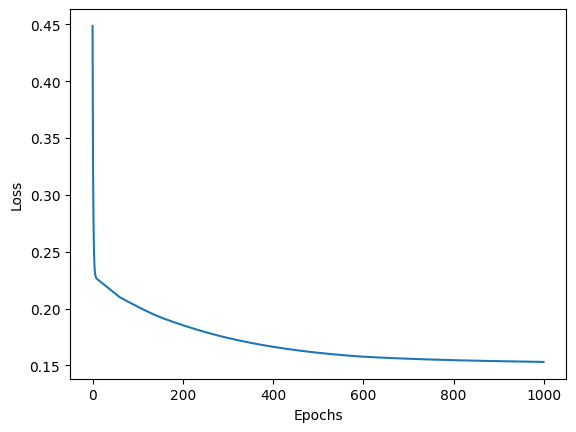

ann Accuracy: 0.8116883116883117


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def relu(x):
    # return np.maximum(0,x)   #relu
    return 1/(1+np.exp(-x))

def derivative(x):
   # return (x > 0).astype(int)    #relu derivate
     return x*(1-x)

def bound(x):
    return np.clip(x,-1,1)

i_n=x.shape[1]
h_n=12
h_o=1

w1 = np.random.randn(i_n, h_n)
b1 = np.ones((1, h_n))
w2 = np.random.randn(h_n, h_o)
b2 = np.ones((1, h_o))

l= 0.01
error=0
lt=np.array([])
epoch=1000
t=y_train.reshape(-1,1)
i = x_train
max_gradient_norm = 1.0
for j in range(epoch):

        hidden_o=relu(np.dot(i,w1)+b1)
        final_o=relu(np.dot(hidden_o,w2)+b2)
        output_error =final_o-t

        error=np.mean((t - final_o) ** 2)
        # if len(lt)!=0 and error>lt[-1] :
        #     break;

        final_e=derivative(final_o)*(output_error)
        hidden_e=np.dot(final_e,w2.T)*derivative(hidden_o)

        gradient_final_o=np.dot(hidden_o.T,final_e)
        gradient_hidden_o=np.dot(i.T,hidden_e)

        if np.linalg.norm(gradient_final_o) > max_gradient_norm:
            gradient_final_o =gradient_final_o* max_gradient_norm /np.linalg.norm(gradient_final_o)
        if np.linalg.norm (gradient_hidden_o) > max_gradient_norm:
            gradient_hidden_o = gradient_hidden_o * max_gradient_norm /np.linalg.norm (gradient_hidden_o)

        w2=bound(w2-l*np.where(gradient_final_o<0,gradient_final_o,0))
        w1=bound(w1-l*np.where(gradient_hidden_o<0,gradient_hidden_o,0))

        b2=bound(b2-l*final_e.sum(axis=0, keepdims=True))
        b1=bound(b1-l*hidden_e.sum(axis=0, keepdims=True))


        if j % 100 == 0:
            print(f"Epoch {j}, Loss: {error}")
        lt=np.append(lt,error)

plt.plot(lt)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

hidden_o = relu(np.dot(x_test, w1) + b1)
final_o = np.dot(hidden_o, w2) + b2
predictions = np.where(final_o >= 0.5, 1, 0)
temp=y_test.reshape(-1,1)
accuracy = np.mean(predictions == temp)
print(f"ann Accuracy: {accuracy}")

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC

# svm_classifier = SVC(kernel='rbf',gamma=0.04)

# # Perform 5-fold cross-validation (for example)
# scores = cross_val_score(svm_classifier, x_train, y_train, cv=6)

# print("Cross-Validation Scores:", scores)
# print("Mean Accuracy:", scores.mean())

Epoch 0, Loss: 0.2466807353734335
Epoch 100, Loss: 0.16157902472818678
Epoch 200, Loss: 0.14781794832312
Epoch 300, Loss: 0.14342695058430663
Epoch 400, Loss: 0.14187696681212886
Epoch 500, Loss: 0.14067546052352686
Epoch 600, Loss: 0.13981190829929824
Epoch 700, Loss: 0.13900748355164058
Epoch 800, Loss: 0.13826096576374872
Epoch 900, Loss: 0.137576757919477


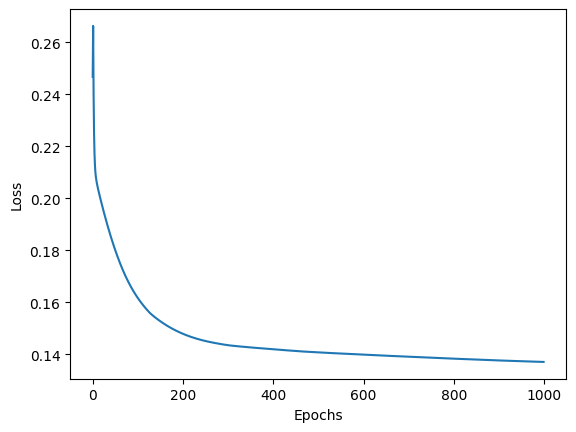

ANN Accuracy: 0.7792207792207793


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_nodes, output_size):
        self.input_size = input_size
        self.hidden_nodes = hidden_nodes
        self.output_size = output_size
        self.initialize_weights()

    def initialize_weights(self):
        self.weights = []
        self.biases = []

        layer_sizes = [self.input_size] + self.hidden_nodes + [self.output_size]

        for i in range(len(layer_sizes) - 1):
            weight_matrix = np.random.randn(layer_sizes[i], layer_sizes[i+1])
            bias_vector = np.ones((1, layer_sizes[i+1]))
            self.weights.append(weight_matrix)
            self.biases.append(bias_vector)

    def relu(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        return x * (1 - x)

    # def relu(self, x):  # Change the activation function to tanh
    #     return np.tanh(x)

    # def derivative(self, x):  # Derivative of tanh
    #     return 1 - np.tanh(x)**2

    def bound(self, x):
        return np.clip(x, -1, 1)

    def train(self, x_train, y_train, learning_rate=0.01, max_epochs=1000, max_gradient_norm=1.0):
      self.loss_history = []
      t = y_train.reshape(-1, 1)

      for epoch in range(max_epochs):
          hidden_layers_output = [x_train]
          layer_input = x_train

          for i in range(len(self.hidden_nodes)):
              layer_input = self.relu(np.dot(layer_input, self.weights[i]) + self.biases[i])
              hidden_layers_output.append(layer_input)

          final_output = self.relu(np.dot(layer_input, self.weights[-1]) + self.biases[-1])

          error = np.mean((t - final_output) ** 2)

          final_error = self.derivative(final_output) * (final_output - t)
          backpropagated_error = [final_error]

          for i in range(len(self.hidden_nodes) - 1, -1, -1):
              error_at_layer = np.dot(backpropagated_error[-1], self.weights[i+1].T) * self.derivative(hidden_layers_output[i+1])
              backpropagated_error.append(error_at_layer)

          backpropagated_error.reverse()

          for i in range(len(self.hidden_nodes) + 1):
              gradient = np.dot(hidden_layers_output[i].T, backpropagated_error[i])
              gradient_norm = np.linalg.norm(gradient)

              if gradient_norm > max_gradient_norm:
                  gradient = gradient * max_gradient_norm / gradient_norm

              self.weights[i] = self.bound(self.weights[i] - learning_rate * gradient)
              self.biases[i] = self.bound(self.biases[i] - learning_rate * np.sum(backpropagated_error[i], axis=0, keepdims=True))

          self.loss_history.append(error)

          if epoch % 100 == 0:
              print(f"Epoch {epoch}, Loss: {error}")

    def predict(self, x_test):
        hidden_layers_output = [x_test]
        layer_input = x_test

        for i in range(len(self.hidden_nodes)):
            layer_input = self.relu(np.dot(layer_input, self.weights[i]) + self.biases[i])
            hidden_layers_output.append(layer_input)

        final_output = np.dot(layer_input, self.weights[-1]) + self.biases[-1]
        predictions = np.where(final_output >= 0.5, 1, 0)

        return predictions

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def evaluate_accuracy(self, x_test, y_test):
        predictions = self.predict(x_test)
        temp = y_test.reshape(-1, 1)
        accuracy = np.mean(predictions == temp)
        return accuracy

# Example usage:
# Create a neural network with two hidden layers, one with 16 nodes and one with 32 nodes
nn = NeuralNetwork(input_size=x_train.shape[1], hidden_nodes=[12], output_size=1)

# Train the network
nn.train(x_train, y_train,0.01)

# Plot the loss history
nn.plot_loss_history()

# Evaluate accuracy on test data
accuracy = nn.evaluate_accuracy(x_test, y_test)
print(f"ANN Accuracy: {accuracy}")
